# Forecasting Tornados Using Logistic Regression 

Sam Erens, Emily Hasson, and Lucas Nelson<br>
Wednesday, May 11th, 2022<br>
STAT 480 Data Science Foundations<br>
Dr. James Balamuta, Ph.D.<br>
University of Illinois Urbana-Champaign<br>

In this notebook, we will be using logistic regression to forecast tornados in the United States.

## Background

A <b>tornado</b>, also known as a <b>cyclone</b>, <b>twister</b>, or <b>whirlwind</b>, is a type of severe weather event in which a violently rotating column of air maintains contact with both the surface of the Earth and the base of a cumulonimbus cloud. Tornados come in many different shapes and sizes. Tornados are especially common in the United States, where they kill a significant number of people and animals and cause significant damage to homes and crops. The vast majority of tornados cause little damage, but occasionally a tornado may cause massive destruction and loss of life. Thus, forecasting tornados is of great practical importance.<sup>1</sup>

A <b>logistic function</b> or <b>logistic curve</b> is a common S-shaped curve (sigmoid curve) with equation

$$f(x)=\frac{L}{1+e^{-k(x-x_0)}}$$

where $x_0$ is the $x$-coordinate of the curve's midpoint, $L$ is the curve's maximum value, and $k$ is the logistic growth rate or steepness of the curve.<sup>2</sup>

In statistics, <b>logistic regression</b> is a technique that uses the logistic function to predict the probability of an event. Logistic regression has found use in a wide variety of applications, from prediciting whether or not a person will default on their credit card to trying to determine whether or not a cancer patient has a benign or malignant tumor. In our case, we will be using logistic regression to forecast the occurence of tornados at various weather stations located across the United States.<sup>3</sup>

For this project, we will be using the Global Summary of the Day (GSOD) dataset from the National Oceanic and Atmospheric Administration (NOAA).<sup>4,5</sup> Each record in the dataset consists of the daily average readings at a single weather station for 18 different variables including air temperature, sea level pressure, and maximum sustained windspeed, among others. Daily average readings are recorded for 7102 unique weather stations in 203 different countries across the world. However, since tornados are primarily an American phenomenon, our analysis will focus primarily on the United States.

In the first part of the project, we will fit a logistic regression model to the entire United States. In the second part of the project, we will fit a separate model to each of the four U.S. Census Bureau regions (Northeast, South, Midwest, and West).<sup>6</sup> In the third part of the project, we will fit a separate logistic regression model to each of the 1416 individual weather stations located in the United Stations. At the end, we will compare the results from each part in order to determine which method is the most effective and what improvements, if any, can be made to the process in order to improve the accuracy of our forecasts.

Let's begin!

## Part 1: Country-Wide Analysis

In the first part of the project, we will fit a single logistic regression model to the entire United States. However, before we begin, we will import several popular libraries to help automate some of the more common data science and machine learning routines, namely NumPy, pandas, and scikit-learn.<sup>7,8,9</sup>

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

Furthermore, we will import several useful functions from the scikit-learn library that will come in handy later.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Finally, we will suppress warnings, since they can be very annoying.

In [3]:
import warnings

In [4]:
warnings.filterwarnings(action = 'ignore')

With that taken care of, we are now ready to begin the analysis.

First, we will read in the data from the following directory.

In [5]:
path = '/Users/samerens/serens2@illinois.edu - Google Drive/My Drive/STAT 480/Data/2000weatherdata_updated.csv'

In [6]:
df = pd.read_csv(path)

A sample of the data is shown below.

In [7]:
df

,station_num,temp_ft,dewpt_ft,slp_mb,visib_mi,wind_knt,maxwind_knt,max_gust_knt,year,month,...,precip_in,precip_flag,max_temp_frnht,min_temp_frnht,ctry,st,lat,lon,elev(m),country name
0,718780,17.2,14.4,1007.6,10.2,6.8,12.0,0.0,2000,1,...,0.00,G,25.7,6.8,CA,NaN,52.183,-113.900,904.6,CANADA
1,718780,0.3,-6.7,1020.1,10.3,8.5,12.0,0.0,2000,1,...,0.05,G,6.6,-4.2,CA,NaN,52.183,-113.900,904.6,CANADA
2,718780,-6.6,-13.9,1028.0,15.0,4.9,8.0,0.0,2000,1,...,0.06,G,6.8,-13.0,CA,NaN,52.183,-113.900,904.6,CANADA
3,718780,12.6,6.3,1010.3,15.0,3.1,8.9,0.0,2000,1,...,0.00,G,26.8,3.2,CA,NaN,52.183,-113.900,904.6,CANADA
4,718780,20.3,16.8,1012.0,13.3,5.8,13.0,0.0,2000,1,...,0.00,H,28.2,5.2,CA,NaN,52.183,-113.900,904.6,CANADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540612,165970,63.8,56.8,NaN,5.9,11.8,23.9,35.0,2000,12,...,0.00,NaN,0.0,57.2,MT,NaN,35.857,14.478,91.4,MALTA
2540613,165970,57.0,0.0,NaN,6.8,0.0,15.9,41.0,2000,12,...,0.20,F,61.9,52.0,MT,NaN,35.857,14.478,91.4,MALTA
2540614,165970,57.6,47.7,NaN,7.1,14.6,28.9,0.0,2000,12,...,0.05,F,62.4,53.6,MT,NaN,35.857,14.478,91.4,MALTA
2540615,165970,58.5,46.2,NaN,6.9,16.2,33.0,52.1,2000,12,...,0.03,F,61.7,57.2,MT,NaN,35.857,14.478,91.4,MALTA


Since the main focus of this project is on the United States, we will retain only records from weather stations located in the United States.

In [8]:
df = df[df['country name'] == 'UNITED STATES']

In [9]:
df

,station_num,temp_ft,dewpt_ft,slp_mb,visib_mi,wind_knt,maxwind_knt,max_gust_knt,year,month,...,precip_in,precip_flag,max_temp_frnht,min_temp_frnht,ctry,st,lat,lon,elev(m),country name
191474,726883,37.0,32.0,1011.5,0.0,8.4,22.0,27.0,2000,1,...,0.0,I,46.9,25.0,US,OR,45.826,-119.261,195.4,UNITED STATES
191475,726883,37.0,32.0,1011.5,0.0,8.4,22.0,27.0,2000,1,...,0.0,I,46.9,25.0,US,OR,45.828,-119.259,196.0,UNITED STATES
191476,726883,40.1,30.3,1013.2,10.0,13.2,22.9,28.0,2000,1,...,0.0,I,46.9,34.0,US,OR,45.826,-119.261,195.4,UNITED STATES
191477,726883,40.1,30.3,1013.2,10.0,13.2,22.9,28.0,2000,1,...,0.0,I,46.9,34.0,US,OR,45.828,-119.259,196.0,UNITED STATES
191478,726883,35.0,32.1,1026.4,0.0,5.7,15.9,0.0,2000,1,...,0.0,H,46.0,25.0,US,OR,45.826,-119.261,195.4,UNITED STATES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038392,724839,41.0,36.1,1023.4,3.2,2.4,7.0,0.0,2000,12,...,0.0,I,57.9,28.0,US,CA,38.683,-121.583,8.0,UNITED STATES
1038393,724839,40.4,36.3,1020.6,2.8,0.5,4.1,0.0,2000,12,...,0.0,I,0.0,30.0,US,CA,38.696,-121.590,7.0,UNITED STATES
1038394,724839,40.4,36.3,1020.6,2.8,0.5,4.1,0.0,2000,12,...,0.0,I,0.0,30.0,US,CA,38.683,-121.583,8.0,UNITED STATES
1038395,724839,0.0,35.9,0.0,2.5,1.1,4.1,0.0,2000,12,...,0.0,I,53.6,28.4,US,CA,38.696,-121.590,7.0,UNITED STATES


Now would be a good time to check for invalid or NaN values in our dataset, since they may interfere with our analysis.

In [10]:
df.isna().sum() / len(df)

station_num       0.000000
temp_ft           0.000000
dewpt_ft          0.026638
slp_mb            0.352204
visib_mi          0.026423
wind_knt          0.000431
maxwind_knt       0.000438
max_gust_knt      0.011484
year              0.000000
month             0.000000
day               0.000000
fog               0.000000
rain              0.000000
snow              0.000000
hail              0.000000
thunder           0.000000
tornado           0.000000
precip_in         0.000000
precip_flag       0.072920
max_temp_frnht    0.000000
min_temp_frnht    0.000000
ctry              0.000000
st                0.027655
lat               0.000038
lon               0.000038
elev(m)           0.000038
country name      0.000000
dtype: float64

Indeed, we see that the `slp_mb` column has a high proportion of NaN values relative to the size of the dataset. Thus, we will exclude this column from our analysis. Since the remaining columns have a relatively low proportion of NaN values, we will simply convert these to zeros.

In [11]:
df.drop('slp_mb', axis = 1, inplace = True)

In [12]:
df.fillna(value = 0, downcast = 'infer', inplace = True)

In [13]:
df.isna().sum()

station_num       0
temp_ft           0
dewpt_ft          0
visib_mi          0
wind_knt          0
maxwind_knt       0
max_gust_knt      0
year              0
month             0
day               0
fog               0
rain              0
snow              0
hail              0
thunder           0
tornado           0
precip_in         0
precip_flag       0
max_temp_frnht    0
min_temp_frnht    0
ctry              0
st                0
lat               0
lon               0
elev(m)           0
country name      0
dtype: int64

Much better. Finally, let's look at the different data types in our dataset.

In [14]:
df.dtypes

station_num         int64
temp_ft           float64
dewpt_ft          float64
visib_mi          float64
wind_knt          float64
maxwind_knt       float64
max_gust_knt      float64
year                int64
month               int64
day                 int64
fog                 int64
rain                int64
snow                int64
hail                int64
thunder             int64
tornado             int64
precip_in         float64
precip_flag        object
max_temp_frnht    float64
min_temp_frnht    float64
ctry               object
st                 object
lat               float64
lon               float64
elev(m)           float64
country name       object
dtype: object

Looking at the different data types, we see that they are mostly numeric (int or float) with a few categorical (object) types mixed in. Since logistic regression is not equipped to handle categorical data, we will simply drop these variables for now, saving the state variable since we will need it later for the regional analysis.

In [15]:
st = df['st']

In [16]:
df.drop(['precip_flag', 'ctry', 'st', 'country name'], axis = 1, inplace = True)

In [17]:
df.dtypes

station_num         int64
temp_ft           float64
dewpt_ft          float64
visib_mi          float64
wind_knt          float64
maxwind_knt       float64
max_gust_knt      float64
year                int64
month               int64
day                 int64
fog                 int64
rain                int64
snow                int64
hail                int64
thunder             int64
tornado             int64
precip_in         float64
max_temp_frnht    float64
min_temp_frnht    float64
lat               float64
lon               float64
elev(m)           float64
dtype: object

We are now ready to fit the model.

The first step in fitting the model is to split the data into a training set and a test set. To do so, we will make use of the `train_test_split` function from the scikit-learn module.

In [18]:
train_df, test_df = train_test_split(df)

Furthermore, we will split each dataset into a set of predictor or $x$ variables, and the response or $y$ variable, in this case a binary variable indicating the presence or absence of a tornado at each weather station.

In [19]:
train_x = train_df.drop('tornado', axis = 1)
train_y = train_df['tornado']

In [20]:
test_x = test_df.drop('tornado', axis = 1)
test_y = test_df['tornado']

Next, we will instantiate a logistic regression model and fit it to the training data.

In [21]:
model = LogisticRegression()

In [22]:
model.fit(train_x, train_y)

LogisticRegression()

Finally, we will evaluate the accuracy of the model on the test data.

In [23]:
predict = model.predict(test_x)

In [24]:
accuracy_score(y_true = test_y, y_pred = predict)

0.9999197094426419

99.99% accuracy! It seems too good to be true, until you realize that the model is predicting all zeros…

In [25]:
sum(predict)

0

…and that there are only 49 tornados recorded in the dataset, out of 846,923 total records.

In [26]:
sum(df['tornado'])

49

In [27]:
len(df)

846923

Oh, well. At least it's a start.

## Part 2: Regional Analysis 

In the second part of the project, we will fit a separate logistic regression model to each region of the United States.

For statistical analysis purposes, the U.S. Census Bureau divides the United States into four regions based on state boundaries, shown in the map below. Each region is further divided into subregions, but for the purposes of this project, we will use only the four main regions: Northeast, South, Midwest, and West.

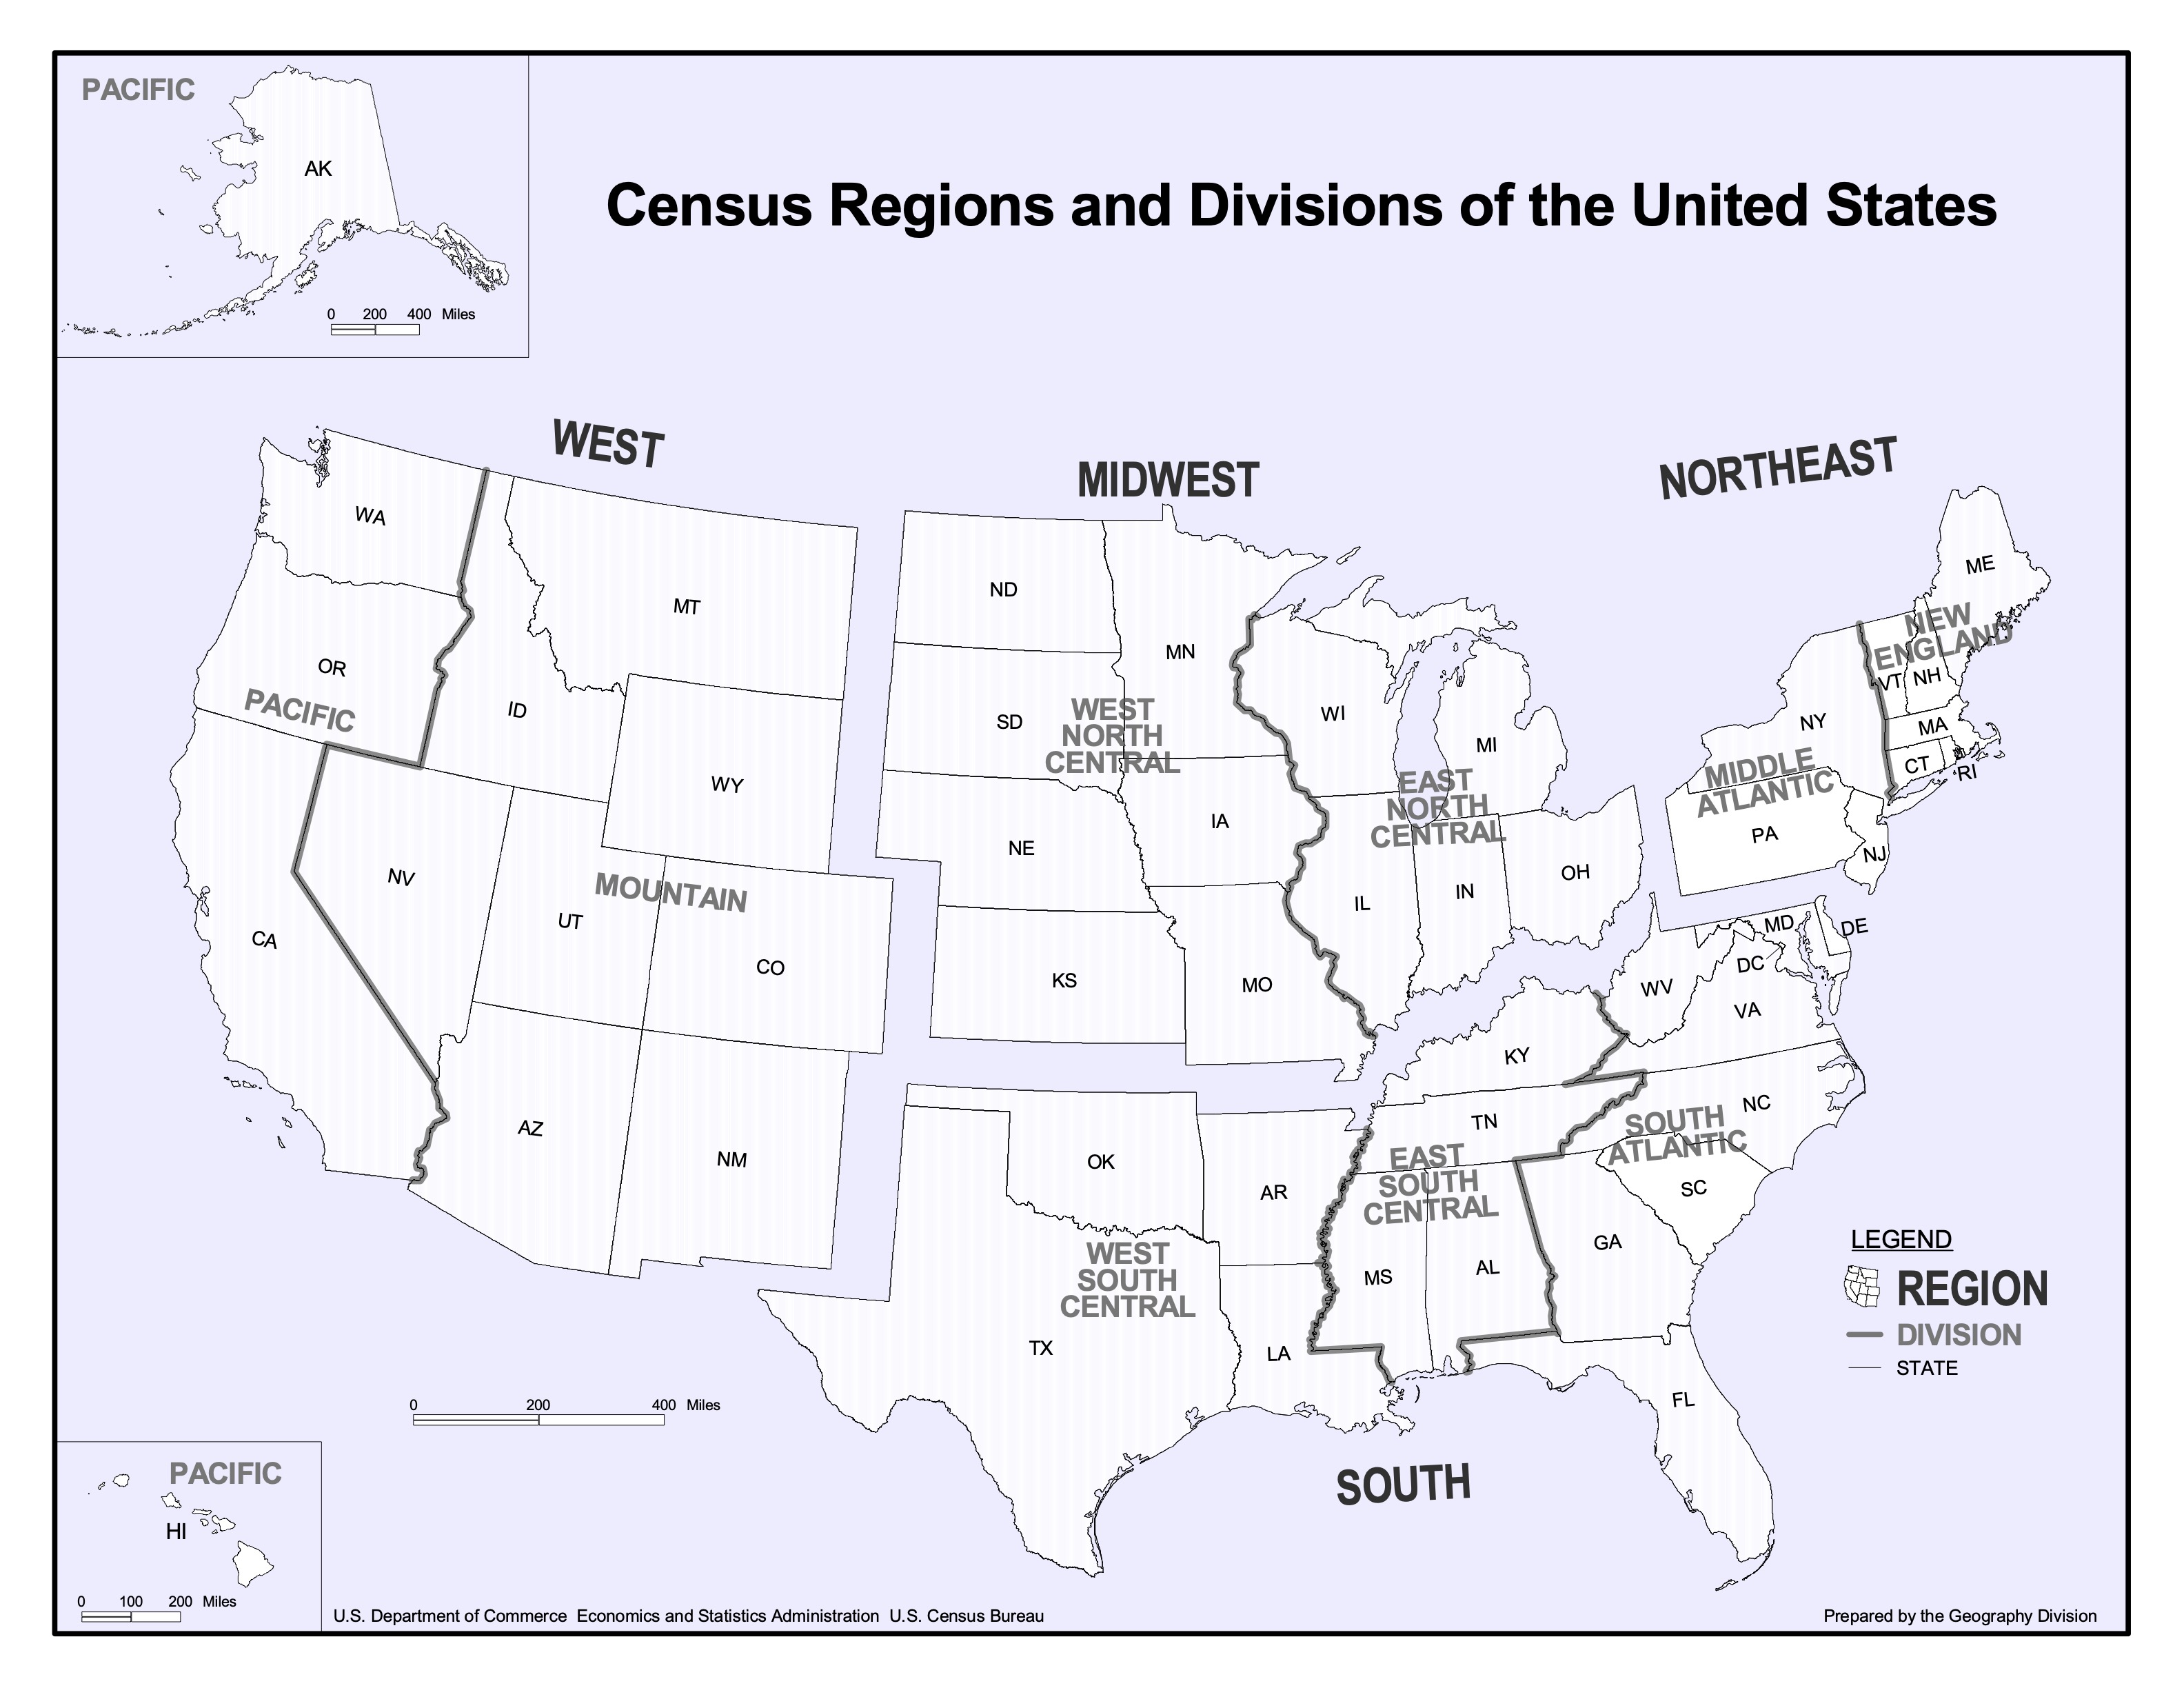

Since the regions are based on state boundaries, we can use the state variable to define the regions. However, we dropped the state variable from the dataset in part one since it is categorical. We will now add it back in.

In [28]:
df['st'] = st

In [29]:
df

,station_num,temp_ft,dewpt_ft,visib_mi,wind_knt,maxwind_knt,max_gust_knt,year,month,day,...,hail,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht,lat,lon,elev(m),st
191474,726883,37.0,32.0,0.0,8.4,22.0,27.0,2000,1,1,...,0,0,0,0.0,46.9,25.0,45.826,-119.261,195.4,OR
191475,726883,37.0,32.0,0.0,8.4,22.0,27.0,2000,1,1,...,0,0,0,0.0,46.9,25.0,45.828,-119.259,196.0,OR
191476,726883,40.1,30.3,10.0,13.2,22.9,28.0,2000,1,2,...,0,0,0,0.0,46.9,34.0,45.826,-119.261,195.4,OR
191477,726883,40.1,30.3,10.0,13.2,22.9,28.0,2000,1,2,...,0,0,0,0.0,46.9,34.0,45.828,-119.259,196.0,OR
191478,726883,35.0,32.1,0.0,5.7,15.9,0.0,2000,1,3,...,0,0,0,0.0,46.0,25.0,45.826,-119.261,195.4,OR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038392,724839,41.0,36.1,3.2,2.4,7.0,0.0,2000,12,29,...,0,0,0,0.0,57.9,28.0,38.683,-121.583,8.0,CA
1038393,724839,40.4,36.3,2.8,0.5,4.1,0.0,2000,12,30,...,0,0,0,0.0,0.0,30.0,38.696,-121.590,7.0,CA
1038394,724839,40.4,36.3,2.8,0.5,4.1,0.0,2000,12,30,...,0,0,0,0.0,0.0,30.0,38.683,-121.583,8.0,CA
1038395,724839,0.0,35.9,2.5,1.1,4.1,0.0,2000,12,31,...,0,0,0,0.0,53.6,28.4,38.696,-121.590,7.0,CA


Next, we will create a list of the states in each region using the standard two-letter abbreviations used by the United States Postal Service (USPS).<sup>10</sup>

In [30]:
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']

In [31]:
south = ['FL', 'GA', 'AL', 'MS', 'LA', 'TX', 'OK', 'AR', 'TN', 'KY', 'WV', 'VA', 'NC', 'SC', 'MD', 'DE']

In [32]:
midwest = ['OH', 'IN', 'MI', 'WI', 'MN', 'ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'IL']

In [33]:
west = ['AK', 'HI', 'CA', 'OR', 'WA', 'ID', 'MT', 'WY', 'CO', 'UT', 'NV', 'AZ', 'NM']

Let's make sure that we got them all.

In [34]:
len(northeast) + len(south) + len(midwest) + len(west)

50

Good. We will then use these lists to create a dictionary that maps each state to its respective region.

In [35]:
region = {}

In [36]:
region.update({state: 'northeast' for state in northeast})
region.update({state: 'south' for state in south})
region.update({state: 'midwest' for state in midwest})
region.update({state: 'west' for state in west})

In [37]:
region

{'ME': 'northeast',
 'NH': 'northeast',
 'VT': 'northeast',
 'MA': 'northeast',
 'RI': 'northeast',
 'CT': 'northeast',
 'NY': 'northeast',
 'NJ': 'northeast',
 'PA': 'northeast',
 'FL': 'south',
 'GA': 'south',
 'AL': 'south',
 'MS': 'south',
 'LA': 'south',
 'TX': 'south',
 'OK': 'south',
 'AR': 'south',
 'TN': 'south',
 'KY': 'south',
 'WV': 'south',
 'VA': 'south',
 'NC': 'south',
 'SC': 'south',
 'MD': 'south',
 'DE': 'south',
 'OH': 'midwest',
 'IN': 'midwest',
 'MI': 'midwest',
 'WI': 'midwest',
 'MN': 'midwest',
 'ND': 'midwest',
 'SD': 'midwest',
 'NE': 'midwest',
 'KS': 'midwest',
 'MO': 'midwest',
 'IA': 'midwest',
 'IL': 'midwest',
 'AK': 'west',
 'HI': 'west',
 'CA': 'west',
 'OR': 'west',
 'WA': 'west',
 'ID': 'west',
 'MT': 'west',
 'WY': 'west',
 'CO': 'west',
 'UT': 'west',
 'NV': 'west',
 'AZ': 'west',
 'NM': 'west'}

However, before we can split the data by region, we should check for invalid values.

In [38]:
df['st'].unique()

array(['OR', 'AR', 'IN', 'LA', 'MA', 'AK', 'MT', 'MD', 'CA', 'NM', 'MS',
       'UT', 0, 'ME', 'TX', 'VA', 'PA', 'NC', 'OH', 'PR', 'NY', 'HI',
       'KY', 'NJ', 'WI', 'NE', 'FL', 'WY', 'CO', 'OK', 'AZ', 'GA', 'WV',
       'IL', 'TN', 'WA', 'MN', 'IA', 'ID', 'SC', 'NV', 'KS', 'MO', 'SD',
       'MI', 'DE', 'AL', 'CT', 'NH', 'RI', 'ND', 'VT', 'VI'], dtype=object)

Indeed, we see several states that don't belong: `PR` for Puerto Rico, `VI` for the U.S. Virgin Islands, and zero, our missing value placeholder from before. Let's drop these from the dataset.

In [39]:
df = df[df['st'] != 0]

In [40]:
df = df[(df['st'] != 'PR') & (df['st'] != 'VI')]

In [41]:
df['st'].unique()

array(['OR', 'AR', 'IN', 'LA', 'MA', 'AK', 'MT', 'MD', 'CA', 'NM', 'MS',
       'UT', 'ME', 'TX', 'VA', 'PA', 'NC', 'OH', 'NY', 'HI', 'KY', 'NJ',
       'WI', 'NE', 'FL', 'WY', 'CO', 'OK', 'AZ', 'GA', 'WV', 'IL', 'TN',
       'WA', 'MN', 'IA', 'ID', 'SC', 'NV', 'KS', 'MO', 'SD', 'MI', 'DE',
       'AL', 'CT', 'NH', 'RI', 'ND', 'VT'], dtype=object)

In [42]:
len(df['st'].unique())

50

Much better. We will now create a column in the dataset called region that contains the corresponding region that each record was recorded in.

In [43]:
df['region'] = df['st'].apply(lambda state: region[state])

In [44]:
df

,station_num,temp_ft,dewpt_ft,visib_mi,wind_knt,maxwind_knt,max_gust_knt,year,month,day,...,thunder,tornado,precip_in,max_temp_frnht,min_temp_frnht,lat,lon,elev(m),st,region
191474,726883,37.0,32.0,0.0,8.4,22.0,27.0,2000,1,1,...,0,0,0.0,46.9,25.0,45.826,-119.261,195.4,OR,west
191475,726883,37.0,32.0,0.0,8.4,22.0,27.0,2000,1,1,...,0,0,0.0,46.9,25.0,45.828,-119.259,196.0,OR,west
191476,726883,40.1,30.3,10.0,13.2,22.9,28.0,2000,1,2,...,0,0,0.0,46.9,34.0,45.826,-119.261,195.4,OR,west
191477,726883,40.1,30.3,10.0,13.2,22.9,28.0,2000,1,2,...,0,0,0.0,46.9,34.0,45.828,-119.259,196.0,OR,west
191478,726883,35.0,32.1,0.0,5.7,15.9,0.0,2000,1,3,...,0,0,0.0,46.0,25.0,45.826,-119.261,195.4,OR,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038392,724839,41.0,36.1,3.2,2.4,7.0,0.0,2000,12,29,...,0,0,0.0,57.9,28.0,38.683,-121.583,8.0,CA,west
1038393,724839,40.4,36.3,2.8,0.5,4.1,0.0,2000,12,30,...,0,0,0.0,0.0,30.0,38.696,-121.590,7.0,CA,west
1038394,724839,40.4,36.3,2.8,0.5,4.1,0.0,2000,12,30,...,0,0,0.0,0.0,30.0,38.683,-121.583,8.0,CA,west
1038395,724839,0.0,35.9,2.5,1.1,4.1,0.0,2000,12,31,...,0,0,0.0,53.6,28.4,38.696,-121.590,7.0,CA,west


Finally, we will fit a logistic regression model to each region separately using a for-loop and save the results to a pandas dataframe.

In [45]:
regions = ['northeast', 'south', 'midwest', 'west']

totals = []
tornados = []
predicts = []
scores = []

for region in regions:
    
    df_region = df[df['region'] == region]
    df_region.drop(['st', 'region'], axis = 1, inplace = True)
    
    train_df, test_df = train_test_split(df_region)
    
    train_x = train_df.drop('tornado', axis = 1)
    train_y = train_df['tornado']
    
    test_x = test_df.drop('tornado', axis = 1)
    test_y = test_df['tornado']
    
    model = LogisticRegression()
    model.fit(train_x, train_y)
    
    predict = model.predict(test_x)
    predicts.append(sum(predict))
    
    score = accuracy_score(y_true = test_y, y_pred = predict)
    scores.append(score)
    
    totals.append(len(df_region))
    tornados.append(sum(df_region['tornado']))
    
output_df = pd.DataFrame({
    'region': regions,
    'total': totals,
    'tornado': tornados,
    'predict': predicts,
    'score': scores
})

The output is shown below.

In [46]:
output_df

,region,total,tornado,predict,score
0,northeast,85656,1,0,1.000000
1,south,225765,30,0,0.999876
2,midwest,235849,8,0,0.999966
3,west,274779,10,0,0.999971


As you can see, the model has a very high accuracy in the Northeast, which has relatively few tornados compared to the Midwest, West, and especially the South, which has by far the greatest number of tornados of any region.

Before beginning the station-level analysis, we will save the results to a comma-separated values (CSV) file for future reference.

In [47]:
output_path = '/Users/samerens/serens2@illinois.edu - Google Drive/My Drive/STAT 480/gsod-analysis-region.csv'

In [48]:
output_df.to_csv(output_path, index = False)

## Part 3: Station-Level Analysis

In the third and final part of the project, we will fit a separate logistic regression model to each of the 1416 individual weather stations in the dataset. To do so, we will utilize a trick as old as time: the enhanced for-loop.

In [49]:
df.drop(['st', 'region'], axis = 1, inplace = True)

In [50]:
stations = []
totals = []
tornados = []
predicts = []
scores = []

for station in df['station_num'].unique():
    
    df_station = df[df['station_num'] == station]
    
    if sum(df_station['tornado']) > 0:
        
        train_df, test_df = train_test_split(df_station)

        train_x = train_df.drop('tornado', axis = 1)
        train_y = train_df['tornado']

        test_x = test_df.drop('tornado', axis = 1)
        test_y = test_df['tornado']

        model = LogisticRegression()
        
        try: model.fit(train_x, train_y)
        except: continue
        
        stations.append(station)

        predict = model.predict(test_x)
        predicts.append(sum(predict))

        score = accuracy_score(y_true = test_y, y_pred = predict)
        scores.append(score)

        totals.append(len(df_station))
        tornados.append(sum(df_station['tornado']))
    
output_df = pd.DataFrame({
    'station': stations,
    'total': totals,
    'tornado': tornados,
    'predict': predicts,
    'score': scores
})

The output is shown below.

In [51]:
output_df

,station,total,tornado,predict,score
0,722310,366,2,3,0.967391
1,722010,366,8,0,0.989130
2,725620,366,1,0,1.000000
3,722015,366,5,0,0.978261
4,726370,366,1,0,1.000000
5,724650,366,1,0,1.000000
6,725910,366,1,0,1.000000
7,722536,726,2,0,0.994505
8,724698,732,2,0,0.994536
9,722485,698,2,0,1.000000


Out of 1416 total stations in the dataset, only a few appear to have recorded tornados, and the model only predicts a handful of actual tornados.

Finally, we will save the results to a .csv file.

In [52]:
output_path = '/Users/samerens/serens2@illinois.edu - Google Drive/My Drive/STAT 480/gsod-analysis-station.csv'

In [53]:
output_df.to_csv(output_path, index = False)

## Conclusion and Results

Using logistic regression, we were able to achieve near-perfect forecast accuracy. For the country-wide analysis, our model achieved 99.99% accuracy. For the regional analysis, our forecast ranged from 99.97% accuracy in the South, where tornados are relatively common, to 100% accuracy in the Northeast, where tornados are relatively rare. For the station-level analysis, our model was able to achieve very high accuracy at all of the stations with recorded tornados.

While these numbers may seem too good to be true, the reality is that the model is able to achieve such high accuracy simply by predicting no tornados at all. This makes intuitive sense; after all, the probability of a tornado occuring at a particular weather station on any given day is very small, even at stations where tornados are relatively common, such as station #722010, which recorded eight tornados in one year! However, even at this station, the model was able to achieve 99% accuracy by predicting zero tornados.

Obviously, these are not very useful predictions. We would like to know when tornados occur, even if that means sacrifing forecast accuracy. Perhaps a more useful model would use linear regression to predict the total number of tornados at each weather station using the same predictor variables used in the logistic regression model.

## References

<ol>
    <li>https://en.wikipedia.org/wiki/Tornado</li>
    <li>https://en.wikipedia.org/wiki/Logistic_function</li>
    <li>https://en.wikipedia.org/wiki/Logistic_regression</li>
    <li>https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00516</li>
    <li>https://www.noaa.gov/</li>
    <li>https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf</li>
    <li>https://numpy.org/</li>
    <li>https://pandas.pydata.org/</li>
    <li>https://scikit-learn.org/stable/</li>
    <li>https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations</li>
</ol>